In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import matplotlib.pyplot as plt


In [3]:
config_file="C:\\Users\\susha\\Downloads\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
frogen_model="C:\\Users\\susha\\Downloads\\frozen_inference_graph.pb"

In [4]:
model=cv2.dnn_DetectionModel(frogen_model,config_file)

In [5]:
ClassLabels=[]
filename="C:\\Users\\susha\\Downloads\\labels.txt"
with open (filename,'rt',encoding='utf')as fpt:
    ClassLabels=fpt.read().rstrip('\n').split('\n')

In [6]:
print(ClassLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [7]:
len(ClassLabels)

80

In [8]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean(127.5)
model.setInputSwapRB(True)

< cv2.dnn.Model 000001DF8E3786D0>

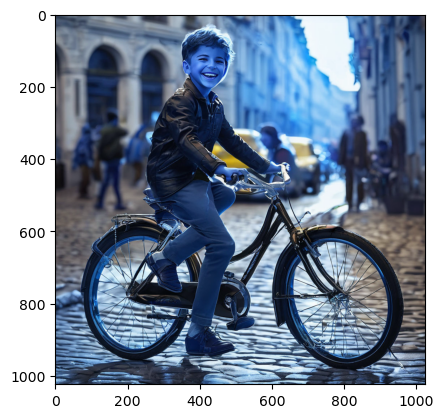

In [9]:
img=cv2.imread("C:\\Users\\susha\\OneDrive\\Desktop\\b6c1635a9a084d77bfcb95fac94f814c.jpeg")
plt.imshow(img)

In [10]:
img

array([[[ 73,  87, 106],
        [ 73,  87, 106],
        [ 74,  88, 107],
        ...,
        [ 78,  80,  91],
        [ 78,  78,  90],
        [ 78,  79,  89]],

       [[ 71,  85, 104],
        [ 71,  85, 104],
        [ 72,  86, 105],
        ...,
        [ 78,  80,  91],
        [ 78,  78,  90],
        [ 78,  79,  89]],

       [[ 67,  81, 100],
        [ 67,  81, 100],
        [ 68,  82, 101],
        ...,
        [ 77,  79,  90],
        [ 78,  78,  90],
        [ 78,  79,  89]],

       ...,

       [[ 96, 135, 187],
        [103, 143, 192],
        [107, 148, 197],
        ...,
        [ 82, 112, 153],
        [ 55,  87, 123],
        [ 41,  73, 108]],

       [[ 84, 117, 163],
        [ 84, 118, 164],
        [ 92, 128, 174],
        ...,
        [ 58,  81, 119],
        [ 59,  85, 121],
        [ 56,  82, 118]],

       [[ 92, 121, 165],
        [ 63,  95, 138],
        [ 61,  94, 139],
        ...,
        [ 35,  51,  87],
        [ 42,  62,  97],
        [ 36,  56,  91]]

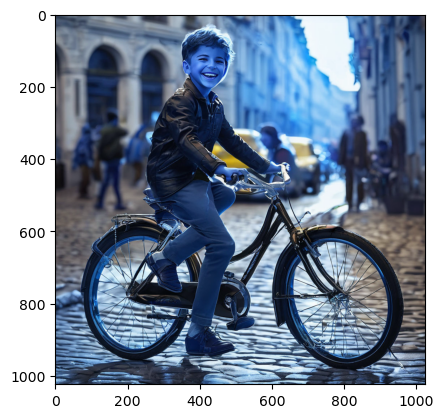

In [11]:
plt.imshow(img)

In [12]:
classindex,confidence,bbox=model.detect(img,confThreshold=0.5)

In [13]:
print(classindex)

[1 2 1 1 4]


In [14]:
front_scale=3
font=cv2.FONT_HERSHEY_PLAIN
for classind,conf,boxes in zip(classindex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,ClassLabels[classind-1],(boxes[0]+10,boxes[1]+40),font,front_scale,color=(0,255,0),thickness=3)

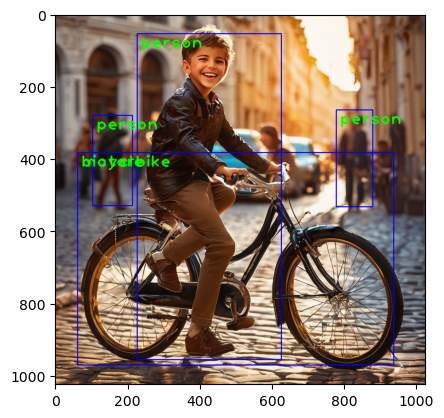

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
#video

In [9]:
import cv2

cap = cv2.VideoCapture("C:\\Users\\susha\\Downloads\\traffic.mp4")
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    print(ClassIndex)
    if len(ClassIndex) != 0:
        for classind, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if classind <= 80:
                cv2.rectangle(frame, boxes, (255, 0, 0))
                cv2.putText(frame, ClassLabels[classind - 1], (boxes[0] + 10, boxes[1] + 40), font, font_scale, color=(0, 255, 0), thickness=3)
    cv2.imshow('od', frame)
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


[6]
[6]
[6]
[6 6 6]
[6]
[6 6]
[6]
[6 6]
[6]
[6]
[6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6]
[6 6]
[6 6]
[6 6 6]
[6 6]
[6 6]
[6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6]
[6]
[6]
[6]
[6]
()
[6]
[6]
()
[6]
[6 6 3]
[6]
[6]
[6]
[6 6]
[6]
[6 6]
[6 6]
[6 6 6 6]
[6 6 6]
[6 6 6 3 6 6]
[6 6 6 3 6 6]
[6 6 6 6]
[6 6 6 6 6]
[6 6 6 6 6 6]
[6 6 6 6 6]
[6 6 6 6 3]
[6 6 6 3]
[6 6 6 3]
[6 6 6 6]
[6 6 6]
[6 6 6 6]
[6 6 6 6 3]
[6 6 6 6 3]
[6 6 6 6 6]
[6 6 6 3]
[6 6 6 3]
[6 6 3 6 6]
[6 6 6 6 3]
[6 6 3]
[6 6 6]
[6 6 6]
[6 6 6 6 6]
[6 6 6]
[6 6 6 6]
[6 6 6]
[6 6]
[6 6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6]
[6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6]
[6 6]
[6 6 6 6]
[6 6 6]
[6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6]
[6]
[6 6]
[6 6]
[6 6 6]
[6 6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6 6]
[6 6]
[6 6 6]
[6 6 6 6 6]
[6 6 6]
[6 6 6]
[6 6 6 6]
[6 6]
[6 6 6]
[6 6 6]
[6 6 6]


## 